# Logistic Regression Project 
   
   
   In this project we will be working with a netflix data set , indicating which movie is recommended and release in which       year. we will create a model that will predict and analysis the accuracy of the movie data set, based on the features.
   
   This data set contains the following features:
   
   * 'show_id' :movies id no
   * 'type' : types of movies and tv show's
   * 'title': name of the movies and tv show's
   * 'director': name of the director 
   * 'cast' :people who have been cast in movies and shows
   * 'country' : country name 
   *  'date_added' : the release date
   * 'release_year' : the year movie release
   * 'rating' : classified by broadcast and cable television network 
   * 'duration' : time duration 
   * 'listed_in': which type of movie is considered as
   * 'description' : description of the movie 

In [1]:
# import the standard library 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the data

In [3]:
net = pd.read_csv('netflix.csv')

In [4]:
net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.5+ KB


In [6]:
net.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [7]:
net.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
net.dropna(axis = 1)

,show_id,type,title,release_year,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,2019,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,2016,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,2013,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,2016,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,2017,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,2016,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,2014,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,2017,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,2017,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,2014,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [9]:
print(net.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [10]:
print(net.shape)

(6234, 12)


# Exploratory Data Analysis
Let's use seaborn to explore the data!

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


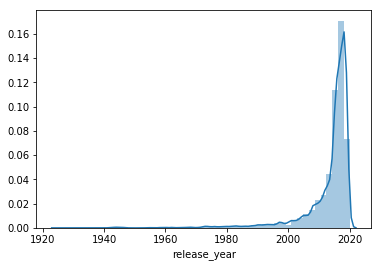

In [11]:
sns.distplot(net['release_year'])

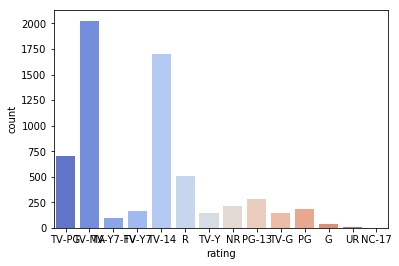

In [12]:
sns.countplot(x='rating',data = net, palette = 'coolwarm')

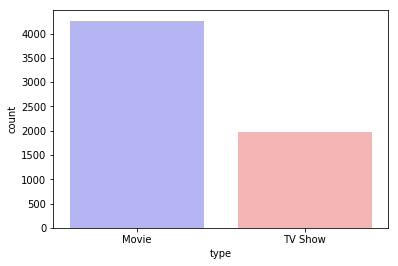

In [13]:
sns.countplot(x ='type', data = net , palette ='bwr')

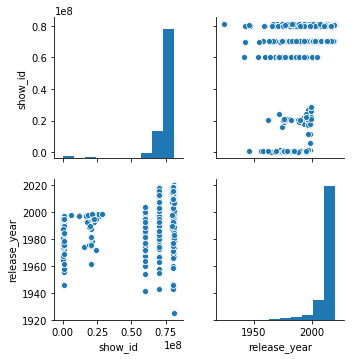

In [14]:
sns.pairplot(net , diag_kind='hist')

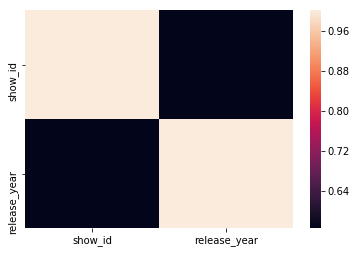

In [15]:
sns.heatmap(net.corr())

# Preprocessing the Data

In [16]:
net = pd.get_dummies(net,drop_first=True)
net[:5]

,show_id,release_year,type_TV Show,title_#Rucker50,title_#Selfie,title_#Selfie 69,title_#realityhigh,title_'89,title_(T)ERROR,title_1 Chance 2 Dance,...,"description_Young urbanites renovating a rundown house, and a psychiatrist grieving his son's disappearance, are connected to a supernatural, decades-old secret.","description_Young women face up to their insecurities and circumstances, finding love and laughs along the way. Featuring a different storyline every season.","description_Yugo, a 12-year-old Eliatrope with special powers, sets out on a mission to find his true family and uncover the mysteries of Wakfu.","description_Yumeko Jabami enrolls at Hyakkaou Private Academy, where students are ranked by their gambling winnings and fame and fortune awaits those on top.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,description_Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise."
0,81145628,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80117401,2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70234439,2013,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80058654,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80125979,2017,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
net.head()

,show_id,release_year,type_TV Show,title_#Rucker50,title_#Selfie,title_#Selfie 69,title_#realityhigh,title_'89,title_(T)ERROR,title_1 Chance 2 Dance,...,"description_Young urbanites renovating a rundown house, and a psychiatrist grieving his son's disappearance, are connected to a supernatural, decades-old secret.","description_Young women face up to their insecurities and circumstances, finding love and laughs along the way. Featuring a different storyline every season.","description_Yugo, a 12-year-old Eliatrope with special powers, sets out on a mission to find his true family and uncover the mysteries of Wakfu.","description_Yumeko Jabami enrolls at Hyakkaou Private Academy, where students are ranked by their gambling winnings and fame and fortune awaits those on top.",description_Zack and Miri make and star in an adult film to bring in easy money. But their unspoken feelings for each other might threaten the whole enterprise.,description_Zany Willy Wonka causes a stir when he announces that golden tickets hidden inside his candy bars will admit holders into his secret confectionary.,"description_Zany misadventures are in store as lovable city mouse Stuart and his human brother, George, raise the roof in this sequel to the 1999 blockbuster.",description_Zenos wants to use the Earth’s negative energy for his own good – and it's up to Miniforce X to stop this space alien’s evil plans.,"description_Zig, an island-bound hyena, will do anything to get his paws on Marina the mermaid, but her devoted pal Sharko always comes to her rescue in time.","description_Zixin is about to marry Qihong, but her gallivanting ex returns to wreak havoc as mistaken identities and love triangles stir up the lovers' paradise."
0,81145628,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80117401,2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,70234439,2013,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80058654,2016,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80125979,2017,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression 
Now it's time to do a train test split, and train our model!

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = net.drop('show_id', axis =1)
y = net['release_year']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=0)

# Train and fit a logistic regression model on the training set

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score

In [22]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Predictions and Evaluations 
** Now predict values for the testing data.**

In [23]:
predictions = lr.predict(X_test)   

In [24]:
predictions[:5]

array([2018, 2018, 2016, 2018, 2016], dtype=int64)

In [25]:
np.array(y[:5])

array([2019, 2016, 2013, 2016, 2017], dtype=int64)

In [26]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

        1925       0.00      0.00      0.00         1
        1942       0.00      0.00      0.00         2
        1943       0.00      0.00      0.00         1
        1944       0.00      0.00      0.00         2
        1945       0.00      0.00      0.00         2
        1946       0.00      0.00      0.00         1
        1956       0.00      0.00      0.00         1
        1958       0.00      0.00      0.00         1
        1959       0.00      0.00      0.00         1
        1960       0.00      0.00      0.00         2
        1962       0.00      0.00      0.00         2
        1963       0.00      0.00      0.00         1
        1964       0.00      0.00      0.00         1
        1966       0.00      0.00      0.00         1
        1967       0.00      0.00      0.00         2
        1968       0.00      0.00      0.00         3
        1969       0.00      0.00      0.00         2
        1970       0.00    

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
accuracy_score(y_test,predictions)*100

24.228432563791007

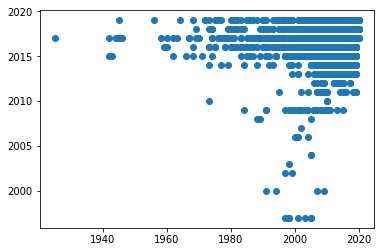

In [28]:
plt.scatter(y_test,predictions)

# Thank You